https://medium.com/mlearning-ai/9-important-data-distributions-real-world-examples-for-each-b804d9d95fe7

# Preparation

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as spss
import plotly.express as px
import seaborn as sns

import random
import time 
import datetime
from time import strptime

In [2]:
insert_database_option = False
insert_prometheus_option = False
random_client=2


if random_client==1:
    normal_data_rownumber= 20000
    abnormal_data_row_number=500
    csv_file_name= "rand1.csv"
    customer_name_list = ["RAND001"]
else:
    normal_data_rownumber= 19000
    abnormal_data_row_number=1000
    customer_name_list = ["RAND002"]
    csv_file_name= "rand2.csv"

total_row_number = normal_data_rownumber+abnormal_data_row_number*2


In [3]:
time_start,time_end = '2022-03-01 9:30:00', '2022-05-24 17:00:00'

# Continuous Distribution

## Uniform Distribution

In [4]:
sns.set(rc={"figure.figsize":(10, 10)}) #width=3, #height=4


<AxesSubplot:ylabel='Count'>

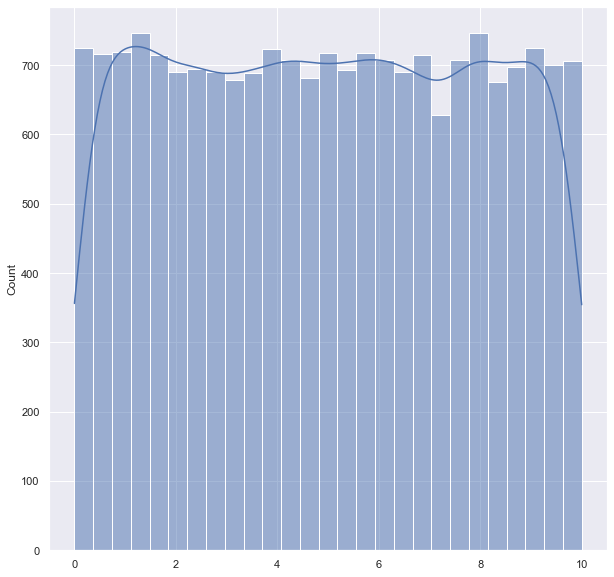

In [5]:
uniform_list = spss.uniform.rvs(size=normal_data_rownumber, loc = 0, scale=10).tolist()
px.histogram(uniform_list) # plotted using plotly express
sns.histplot(uniform_list, kde=True) # plotted using seaborn

## Standard Normal Distribution

<AxesSubplot:ylabel='Count'>

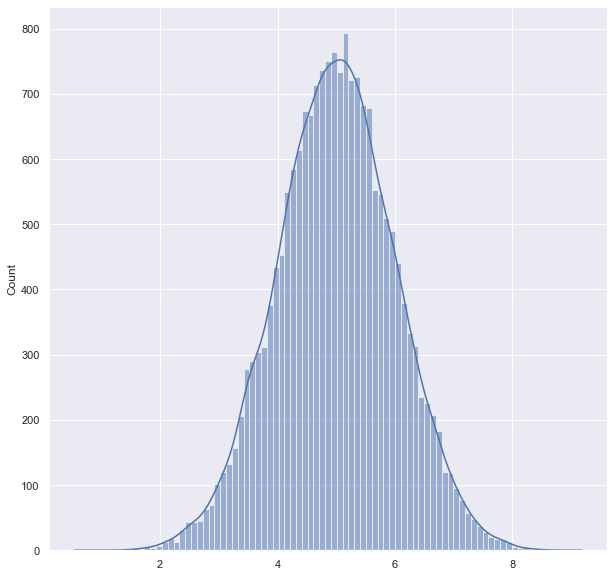

In [6]:
normal_list = spss.norm.rvs(size=normal_data_rownumber,loc=5,scale=1).tolist()
#normal_list= [i*3 for i in normal_list]


sns.histplot(normal_list, kde=True)

## Gamma distribution

C:\Users\Jijun Du\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:ylabel='Density'>

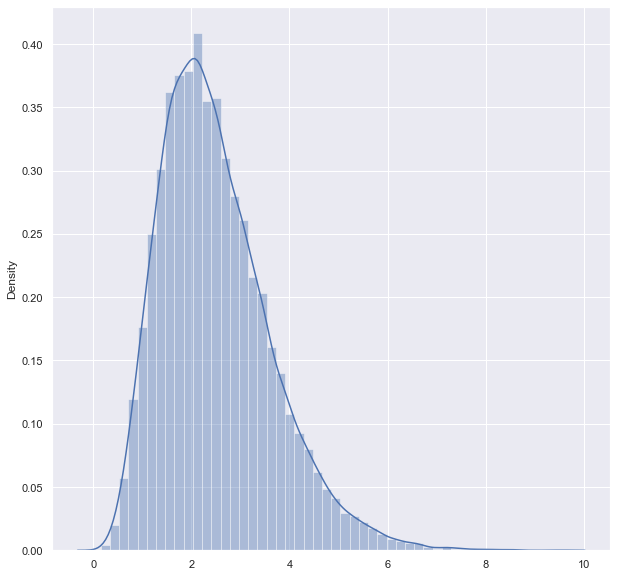

In [7]:
gamma_list = spss.gamma.rvs(a=5, size=normal_data_rownumber).tolist() # size specifies number of random variates, a is the shape parameter

gamma_list= [i/2 for i in gamma_list]
sns.distplot(gamma_list, kde=True)

## Exponential distribution

C:\Users\Jijun Du\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:ylabel='Density'>

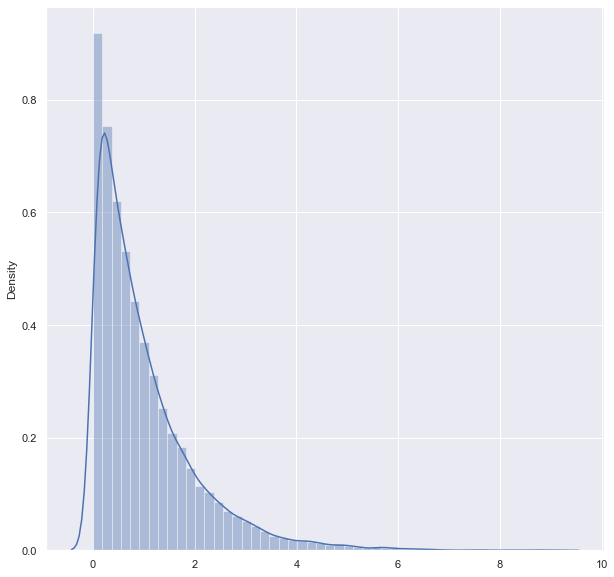

In [8]:
exponential_list = spss.expon.rvs(scale=1,loc=0,size=normal_data_rownumber).tolist() # size specifies number of random variates, loc corresponds to mean, scale corresponds to standard deviation
sns.distplot(exponential_list, kde=True)

# Discrete Distributions

## Binomial Distribution

C:\Users\Jijun Du\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:ylabel='Density'>

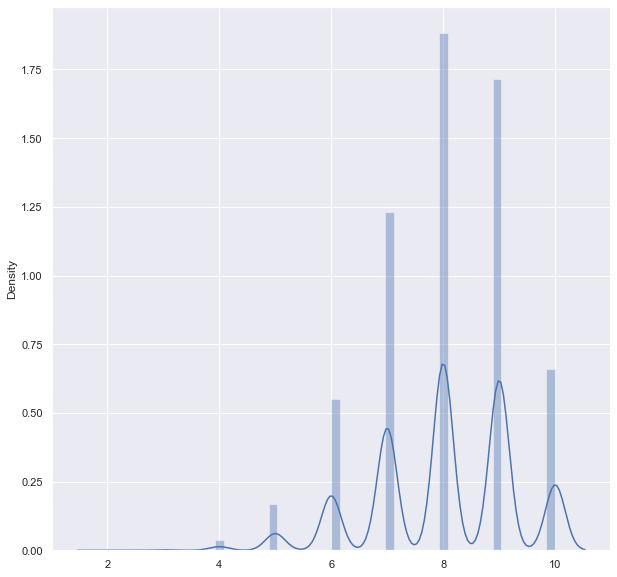

In [9]:
binomial_list = spss.binom.rvs(n=10,p=0.8,size=normal_data_rownumber).tolist() # n = number of trials, p = probability of success, size = number of times to repeat the trials
sns.distplot(binomial_list, kde=True)

## Poisson Distribution

C:\Users\Jijun Du\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:ylabel='Density'>

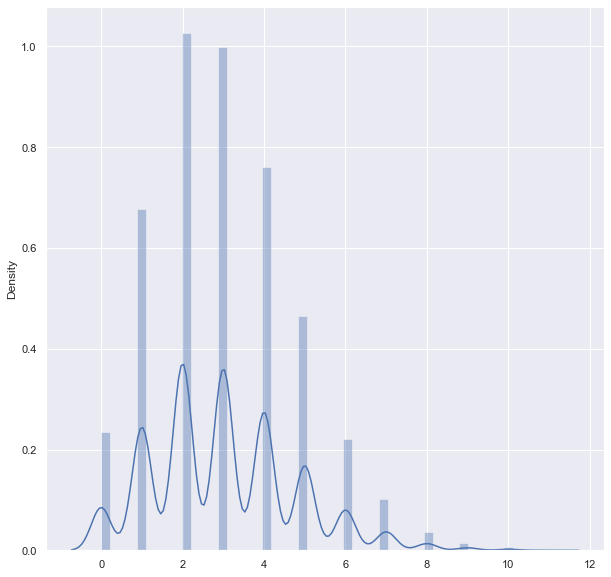

In [10]:
poisson_list = spss.poisson.rvs(mu=3, size=normal_data_rownumber).tolist() # size specifies number of random variates, loc corresponds to mean, scale corresponds to standard deviation
sns.distplot(poisson_list, kde=True)

## bernoulli distribution

C:\Users\Jijun Du\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:ylabel='Density'>

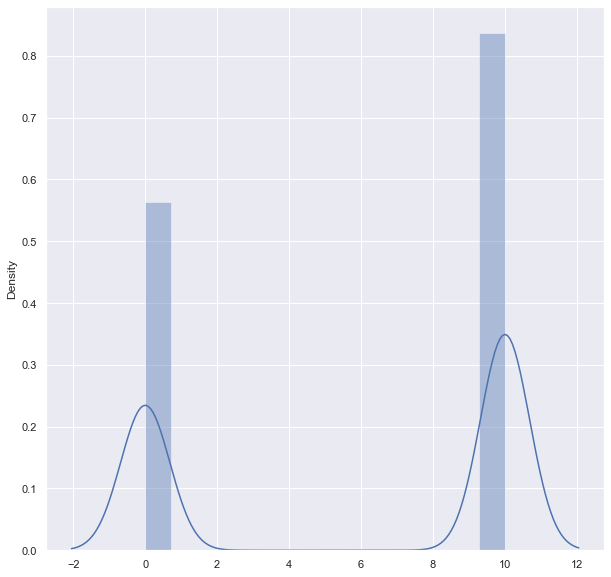

In [11]:
bernoulli_list = spss.bernoulli.rvs(size=normal_data_rownumber,p=0.6).tolist() # p = probability of success, size = number of times to repeat the trial
bernoulli_list = [i*10 for i in bernoulli_list]

sns.distplot(bernoulli_list, kde=True)

<AxesSubplot:title={'center':'All Distributions'}, ylabel='Density'>

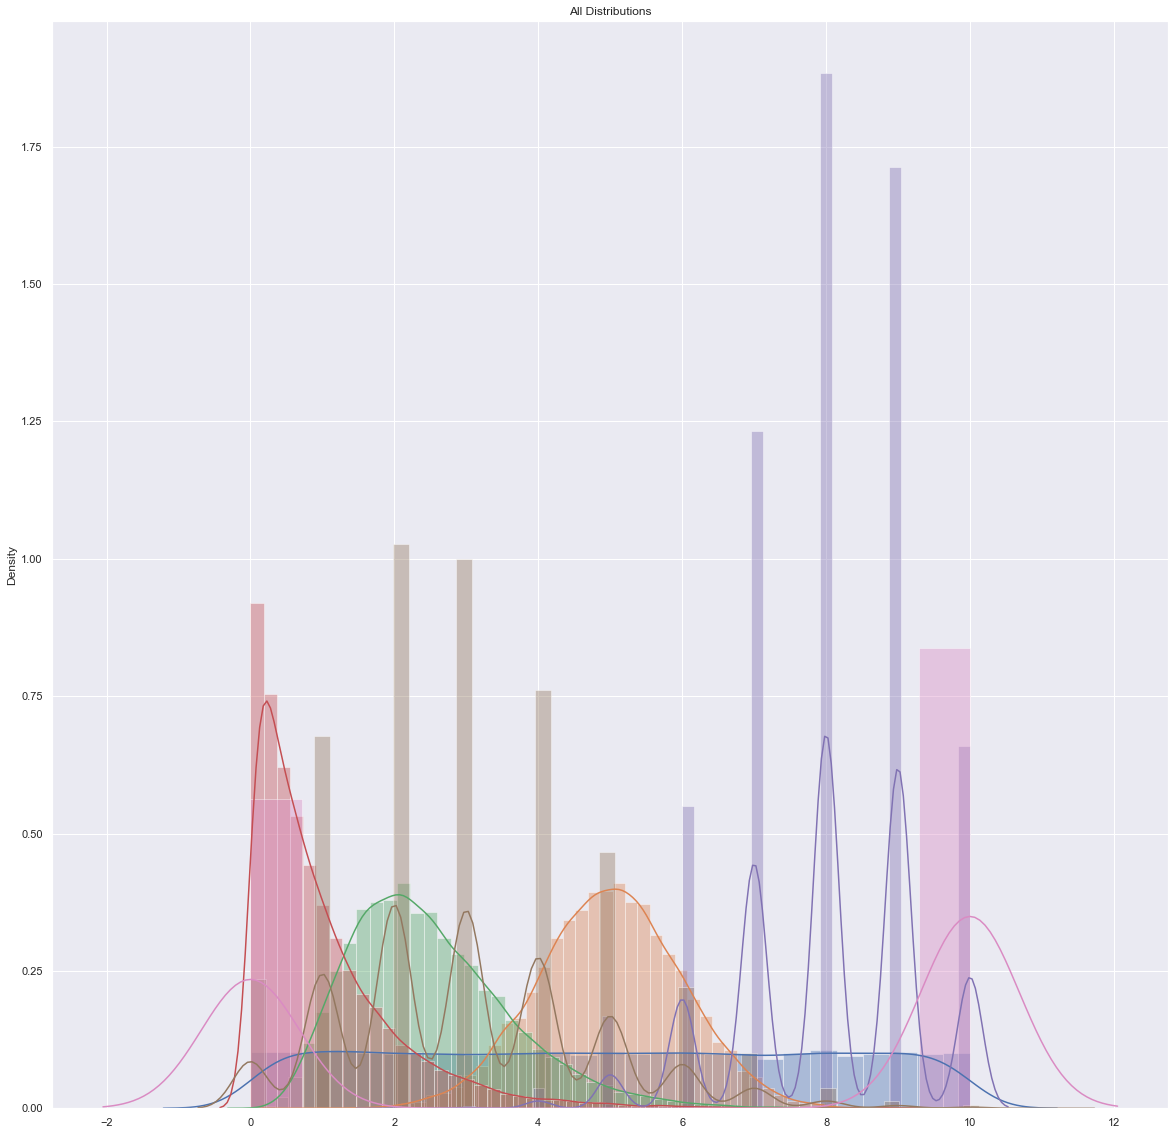

In [12]:

import warnings

warnings.filterwarnings('ignore')
sns.set(rc={"figure.figsize":(20, 20)}) #width=3, #height=4

sns.distplot(uniform_list, kde=True).set(title='All Distributions')
sns.distplot(normal_list, kde=True)
sns.distplot(gamma_list, kde=True)
sns.distplot(exponential_list, kde=True)
sns.distplot(binomial_list, kde=True)
sns.distplot(poisson_list, kde=True)
sns.distplot(bernoulli_list, kde=True)

# Generate Normal Data

In [13]:

continuous_distribution = [uniform_list,normal_list,gamma_list,exponential_list]
discrete_distribution = [binomial_list,poisson_list,bernoulli_list]

In [14]:
column_names = ["uniform","normal","gamma","exponential","binomial","poisson","bernoulli"]

continuous_df = pd.DataFrame(continuous_distribution).T.round(2)
discrete_df =  pd.DataFrame(discrete_distribution).T
normal_data_df = pd.concat([continuous_df,discrete_df],axis=1)
normal_data_df.columns = column_names
normal_data_df


,uniform,normal,gamma,exponential,binomial,poisson,bernoulli
0,1.83,4.63,3.90,0.04,9,4,0
1,7.01,4.83,1.18,0.64,10,4,0
2,9.56,4.62,3.13,2.45,9,0,10
3,8.44,3.35,2.09,2.60,9,5,10
4,0.59,5.21,1.90,1.89,9,2,10
...,...,...,...,...,...,...,...
18995,0.49,2.36,1.60,3.73,7,3,10
18996,0.64,3.78,1.58,2.13,10,5,0
18997,1.88,6.04,4.72,0.33,8,2,10
18998,6.28,3.76,1.23,0.01,9,3,10


# Generate Abnormal Data

- Assuming 4% data are abnormal = 400 Records in total = 4 record per day for 90 days.
- Normal Data Range from 0~10, Anomaly range from [-10:0] or [10:20]



In [15]:
uniform_list_abnormal_upper = spss.uniform.rvs(size=abnormal_data_row_number, loc = 10, scale=10).tolist()
uniform_list_abnormal_lower = spss.uniform.rvs(size=abnormal_data_row_number, loc = -10, scale=10).tolist()

uniform_abnormal= uniform_list_abnormal_upper+uniform_list_abnormal_lower

In [16]:
abnormal_data= [uniform_abnormal,uniform_abnormal,uniform_abnormal,uniform_abnormal,uniform_abnormal,uniform_abnormal,uniform_abnormal]

abnormal_data_df = pd.DataFrame(abnormal_data).T.round(2)
abnormal_data_df.columns=column_names
abnormal_data_df.head()

,uniform,normal,gamma,exponential,binomial,poisson,bernoulli
0,19.94,19.94,19.94,19.94,19.94,19.94,19.94
1,13.00,13.00,13.00,13.00,13.00,13.00,13.00
2,12.91,12.91,12.91,12.91,12.91,12.91,12.91
3,16.07,16.07,16.07,16.07,16.07,16.07,16.07
4,10.99,10.99,10.99,10.99,10.99,10.99,10.99


In [17]:
final_data =  pd.concat([normal_data_df ,abnormal_data_df])


# Combine them together

In [18]:
final_data = final_data.sample(frac=1).reset_index(drop=True)


In [19]:
final_data

,uniform,normal,gamma,exponential,binomial,poisson,bernoulli
0,4.33,4.79,2.48,4.83,7.00,0.00,10.00
1,9.63,4.09,4.56,1.82,7.00,3.00,0.00
2,3.88,3.59,4.90,0.31,7.00,4.00,10.00
3,4.47,5.59,2.81,0.23,10.00,4.00,0.00
4,2.61,3.59,2.01,0.08,10.00,0.00,0.00
...,...,...,...,...,...,...,...
20995,0.51,6.18,3.60,2.04,7.00,3.00,0.00
20996,6.38,4.34,3.99,0.58,7.00,2.00,0.00
20997,7.50,4.92,1.52,1.57,9.00,5.00,10.00
20998,8.90,5.74,2.41,1.75,9.00,3.00,0.00


# Transform generated Data into Gyan-core-stats format

Things need to do:

## 1. Generate 12-7 = 5 More columns


In [20]:
bernoulli_list1 = spss.bernoulli.rvs(size=total_row_number,p=0.1).tolist() # p = probability of success, size = number of times to repeat the trial
bernoulli_list2 = spss.bernoulli.rvs(size=total_row_number,p=0.2).tolist() # p = probability of success, size = number of times to repeat the trial
bernoulli_list3 = spss.bernoulli.rvs(size=total_row_number,p=0.3).tolist() # p = probability of success, size = number of times to repeat the trial
bernoulli_list4 = spss.bernoulli.rvs(size=total_row_number,p=0.4).tolist() # p = probability of success, size = number of times to repeat the trial
bernoulli_list5 = spss.bernoulli.rvs(size=total_row_number,p=0.5).tolist() # p = probability of success, size = number of times to repeat the trial

## Generate customer IDs


In [21]:
# fake 4 customer IDs

nunique_customers= len(customer_name_list)


In [22]:
mapping_list=[]
for num in range(nunique_customers):
    new_customer =  [customer_name_list[num] for i in range(int(total_row_number/nunique_customers))]
    mapping_list.extend(new_customer)
    
assert len(mapping_list) == total_row_number

In [23]:

random.shuffle(mapping_list)


## Generate statstimestamp column

In [24]:
## generate timestamp
timestamp_list = (pd.DataFrame(columns=['NULL'],
                  index=pd.date_range(time_start, time_end,
                                      freq='5T'))
       .between_time('00:00','23:59')
       .index.strftime('%Y-%m-%d %H:%M:%S')
       .tolist()
)

timestamp_list = timestamp_list[:total_row_number]

In [25]:
assert len(timestamp_list) == final_data.shape[0]

In [26]:
last_data= final_data

In [27]:
last_data["bernoulli_list1"] =bernoulli_list1
last_data["bernoulli_list2"] =bernoulli_list2
last_data["bernoulli_list3"] =bernoulli_list3
last_data["bernoulli_list4"] =bernoulli_list4
last_data["bernoulli_list5"] =bernoulli_list5
last_data["mapping_list"]=mapping_list
last_data["timestamp_list"]=timestamp_list

# Insert into Database

In [28]:
last_data.columns

Index(['uniform', 'normal', 'gamma', 'exponential', 'binomial', 'poisson',
       'bernoulli', 'bernoulli_list1', 'bernoulli_list2', 'bernoulli_list3',
       'bernoulli_list4', 'bernoulli_list5', 'mapping_list', 'timestamp_list'],
      dtype='object')

In [29]:
final_df = pd.DataFrame()

In [30]:
# total_attached_user  -> 
# cell_number
# 
final_df["client_id"] = last_data["mapping_list"]
final_df["stats_timestamp"] = last_data["timestamp_list"]
final_df["total_attached_user"] = last_data["bernoulli_list5"]
final_df["total_rejected_user"] = last_data["bernoulli_list4"]
final_df["peak_upload_speed"] = last_data["poisson"]
final_df["peak_download_speed"] = last_data["exponential"]
final_df["enodeb_shutdown_count"] = last_data["bernoulli_list3"]
final_df["handover_failure_count"] = last_data["bernoulli_list2"]
final_df["bearer_active_user_count"] = last_data["bernoulli_list1"]
final_df["bearer_rejected_user_count"] = last_data["bernoulli"]
final_df["total_users"] = last_data["binomial"]
final_df["total_dropped_packets"] = last_data["gamma"]
final_df["enodeb_connected_count"] = last_data["normal"]
final_df["enodeb_connection_status"] = last_data["uniform"]


In [31]:
final_df.to_csv(csv_file_name,index=False)

## Connect with Database

In [32]:
import numpy as np
import mysql.connector
import pandas as pd
from pandas_profiling import ProfileReport

# Initiate with Parameters
db_name= "core_stats"
col = "peak_upload_speed"


# Start Database Connection
db_connection = mysql.connector.connect(
    host="10.1.2.10",
    user="gyan",
    password="5Gaa$2022",
    database="gyan_db"
)

# Create Database Cursor for SQL Queries
mycursor = db_connection.cursor()
mycursor.execute("SELECT * FROM {} LIMIT 5".format(db_name))

myresult = mycursor.fetchall()
for x in myresult:
    print(x)

# Load data from database and store as pandas Dataframe
df = pd.read_sql('SELECT * FROM {}'.format(db_name), con=db_connection)
df.head()

('AMD001', datetime.datetime(2022, 2, 21, 9, 35), 0, 0, 3, 1, 0, 0, 0, 0, 8, 1, 6, 9.71)
('AMD001', datetime.datetime(2022, 2, 21, 10, 10), 1, 0, 4, 2, 0, 0, 1, 0, 9, 3, 5, 4.37)
('AMD001', datetime.datetime(2022, 2, 21, 10, 15), 1, 0, 4, 0, 1, 0, 0, 10, 8, 5, 6, 3.56)
('AMD001', datetime.datetime(2022, 2, 21, 10, 35), 0, 0, 1, 0, 0, 0, 1, 10, 8, 2, 4, 5.59)
('AMD001', datetime.datetime(2022, 2, 21, 10, 55), 1, 0, 5, 1, 0, 0, 0, 10, 7, 4, 6, 9.05)


,client_id,stats_timestamp,total_attached_user,total_rejected_user,peak_upload_speed,peak_download_speed,enodeb_shutdown_count,handover_failure_count,bearer_active_user_count,bearer_rejected_user_count,total_users,total_dropped_packets,enodeb_connected_count,enodeb_connection_status
0,AMD001,2022-02-21 09:35:00,0,0,3,1,0,0,0,0,8,1,6,9.71
1,AMD001,2022-02-21 10:10:00,1,0,4,2,0,0,1,0,9,3,5,4.37
2,AMD001,2022-02-21 10:15:00,1,0,4,0,1,0,0,10,8,5,6,3.56
3,AMD001,2022-02-21 10:35:00,0,0,1,0,0,0,1,10,8,2,4,5.59
4,AMD001,2022-02-21 10:55:00,1,0,5,1,0,0,0,10,7,4,6,9.05


In [33]:
# Export Anomaly_df is a python Dataframe object.
# MySQL Insert Query includes [tableName], (columns to insert)
# The value stores (col1, col2,col3)


if insert_database_option:
    for index, row in final_df.iterrows():
        connection = mysql.connector.connect(
            host="10.1.2.10",
            user="gyan",
            password="5Gaa$2022",
            database="gyan_db"
        )

        cursor = connection.cursor()

        MySQL_insert_query = "INSERT INTO core_stats (client_id, stats_timestamp, total_attached_user, total_rejected_user, peak_upload_speed, peak_download_speed, enodeb_shutdown_count,handover_failure_count,bearer_active_user_count,bearer_rejected_user_count,total_users,total_dropped_packets,enodeb_connected_count,enodeb_connection_status) VALUES (%s, %s, %s, %s, %s, %s, %s,%s,%s, %s, %s, %s, %s,%s)"

        the_value= (row.client_id, str(row.stats_timestamp),row.total_attached_user, row.total_rejected_user, row.peak_upload_speed, row.peak_download_speed, row.enodeb_shutdown_count, row.handover_failure_count,   row.bearer_active_user_count, row.bearer_rejected_user_count,  row.total_users,  row.total_dropped_packets,  row.enodeb_connected_count,row.enodeb_connection_status )
        cursor.execute(MySQL_insert_query, the_value)
        # try:
        connection.commit()
    #     except:
    #         print("Record Inserted")
    #         pass



    cursor.close()
    print("Insert Complete")

# Convert Data Frame to Json

# Insert into Prometheus

In [34]:
"""Application exporter"""

import os
import time
from prometheus_client import start_http_server, Gauge, Enum
import requests
import json
from jproperties import Properties

class AppMetrics:

    
    """
    Representation of Prometheus metrics and loop to fetch and transform
    application metrics into Prometheus metrics.
    """

    def __init__(self, app_port=80, polling_interval_seconds=5):
        self.app_port = app_port
        self.polling_interval_seconds = polling_interval_seconds
        self.gauge_dic={}
        # Prometheus metrics to collect


    def run_metrics_loop(self,json_str):
        """Metrics fetching loop"""

        while True:
            self.fetch(json_str)
            time.sleep(self.polling_interval_seconds)

    def fetch(self,json_str):
        """
        Get metrics from application and refresh Prometheus metrics with
        new values.
        """
        with open(json_str,"r") as json_file:
            status_data = json.load(json_file)
        
        # Update Prometheus metrics with application metrics
        for key,value in status_data.items():
            if key not in self.gauge_dic:
                self.gauge_dic[key] = Gauge(key,key)
                self.gauge_dic[key].set(value)
        
        print("Fetch Complete")


def main():
    """Main entry point"""

    from jproperties import Properties

    configs = Properties()
    debug= True
    if debug == True:
        with open('gyan-core-agent-random.properties', 'rb') as read_prop:
            configs.load(read_prop)
    else:
        with open('gyan-core-agent-random.properties', 'rb') as read_prop:
            configs.load(read_prop)

    db_configs_dict = {}
    items_view = configs.items()

    for item in items_view:
        #print(item[0])
        db_configs_dict[item[0]] = item[1].data

    
    # get variable name from property files.
    client_id = db_configs_dict["clientid"].split(",")[0] 
    polling_interval_seconds = int(db_configs_dict["POLLING_INTERVAL_SECONDS"])
    app_port = int(db_configs_dict["APP_PORT"])
    exporter_port = int(db_configs_dict[client_id+"_EXPORTER_PORT"])
    folder_location = str(db_configs_dict["folder_location"])
    json_location = str(db_configs_dict["json_location"])


    app_metrics = AppMetrics(
        app_port=app_port,
        polling_interval_seconds=polling_interval_seconds
    )
    start_http_server(exporter_port)

    client_id = db_configs_dict["clientid"].split(",")[0]

    if debug:
        json_str = "gyan-core-agent-report-"+client_id+".json"
        app_metrics.run_metrics_loop(json_str)
    else:
        json_str = folder_location+json_location+client_id+".json"
        app_metrics.run_metrics_loop(json_str)
    

if __name__ == "__main__":
    if insert_prometheus_option:
        main()



In [35]:
json_filename= "gyan-core-agent-report-amd001.json"
with open(json_filename, "w") as outfile:
    json.dump(json_data, outfile)

NameError: name 'json_data' is not defined

In [ ]:
from jproperties import Properties
configs = Properties()
with open('gyan-core-agent-random.properties', 'rb') as read_prop:
    configs.load(read_prop)

In [ ]:
db_configs_dict = {}
items_view = configs.items()

for item in items_view:
    print(item[0])
    db_configs_dict[item[0]] = item[1].data